Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import CSV data

In [2]:
from src.components.data_ingestion import DataIngestion
ingestion = DataIngestion()
csv_path = ingestion.initiate_ingestion()

src imported


Show top 5 records

In [3]:
df = pd.read_csv(csv_path)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Dataset size

In [4]:
df.shape

(10000, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [41]:
# Check the statistic of the data
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Missing value

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
numerical_features = [f for f in df.columns if df[f].dtype != 'O']

In [30]:
print(f'Numerical features in churn datasets are: {numerical_features}')
print(f'Total {len(numerical_features)} numerical features are present')

Numerical features in churn datasets are: ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
Total 11 numerical features are present


Preprocess the data

In [26]:
# Drop unnecessary columns
# Drop RowNumber,CustomerId
# df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True,axis=1)
df.drop(columns = ['Surname'],inplace=True,axis = 1)

In [58]:
numerical_features = [f for f in df.columns if df[f].dtype != 'O']
print(f'Numerical features in churn datasets are: {numerical_features}')
print(f'Total {len(numerical_features)} numerical features are present')

Numerical features in churn datasets are: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
Total 9 numerical features are present


In [27]:
print(f'Dataset size after droping columns----->{df.shape}')
df.head()

Dataset size after droping columns----->(10000, 11)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [31]:
categorical_features = [f for f in df.columns if f not in numerical_features]

In [32]:
print(f'Categoriacl features in churn dataset are: {categorical_features}')

Categoriacl features in churn dataset are: ['Geography', 'Gender']


In [37]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [38]:
# Checking the number of unique values in each column
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

Visualizing data

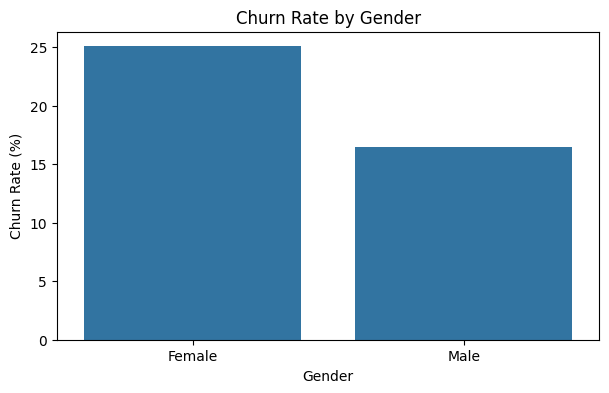

In [49]:
# Data analysis 
# I want to see gender wise exited
# I want to see region wise exited

churn_rate = df.groupby('Gender')['Exited'].mean()*100
plt.figure(figsize=(7,4))
sns.barplot(x=churn_rate.index, y = churn_rate.values)
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by Gender")
plt.show()

Insight 1:
Female customers show a significantly higher churn rate (~25%) compared to male customers (~17%). This indicates that gender is an important factor influencing churn and female customers may require more retention focus.


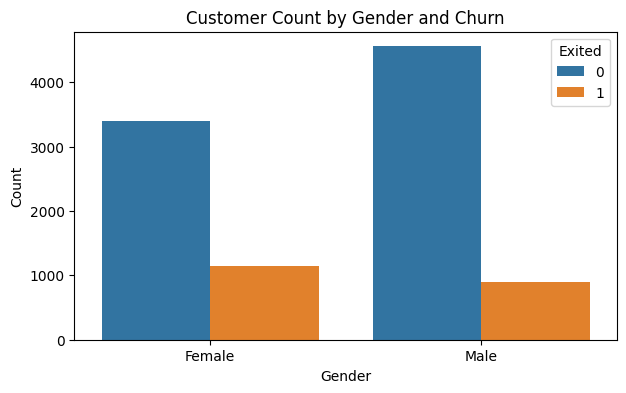

In [50]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Gender', hue='Exited')
plt.title("Customer Count by Gender and Churn")
plt.ylabel("Count")
plt.show()

Insight 2: Although the absolute churn count is higher for males (because the bank has more male customers), the churn rate is significantly higher among females. This indicates that female customers are more likely to leave compared to males.

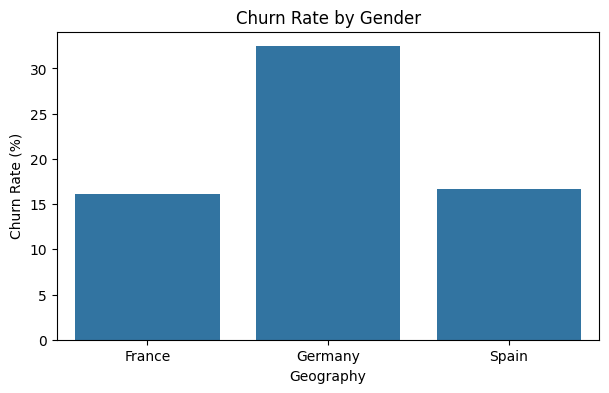

In [51]:
churn_rate = df.groupby('Geography')['Exited'].mean()*100
plt.figure(figsize=(7,4))
sns.barplot(x=churn_rate.index, y = churn_rate.values)
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by Gender")
plt.show()

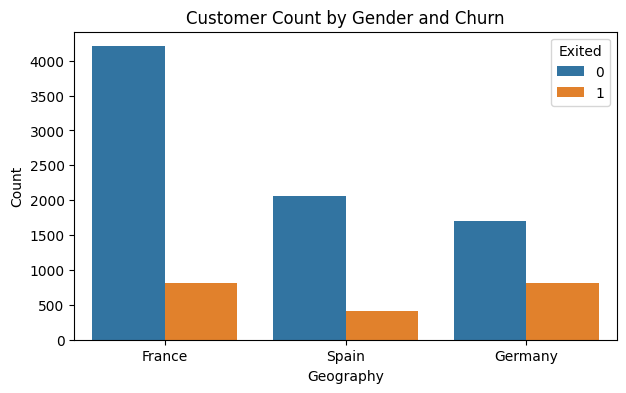

In [52]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Geography', hue='Exited')
plt.title("Customer Count by Gender and Churn")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='Exited', ylabel='Age'>

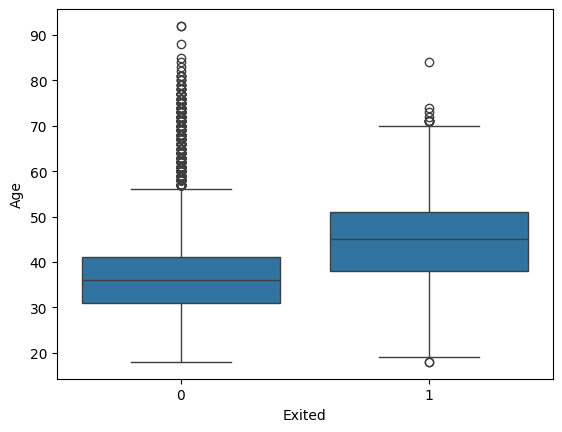

In [53]:
# Analaysis of Age feature. Ineterpretation is that who is exited more younger one or older?
sns.boxplot(data = df,x="Exited",y = "Age")

Insight: From box plot, the observation is middle age grp is more like to churn than younger one.

<Axes: xlabel='Age', ylabel='Count'>

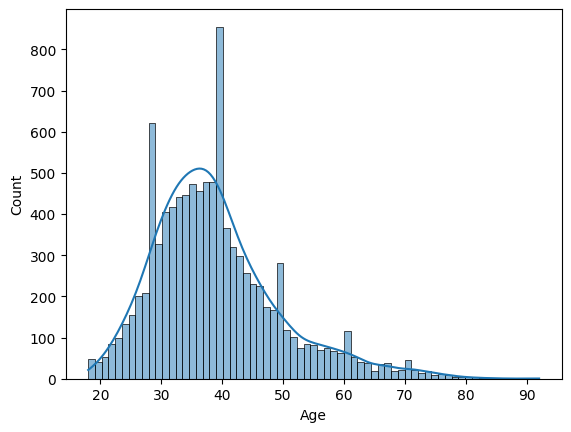

In [54]:
# Histogram/KDE plot of Age
sns.histplot(df["Age"], kde=True)

Insight: 1. left skewed graph
2. 800 around people are in 40 age group.

<Axes: >

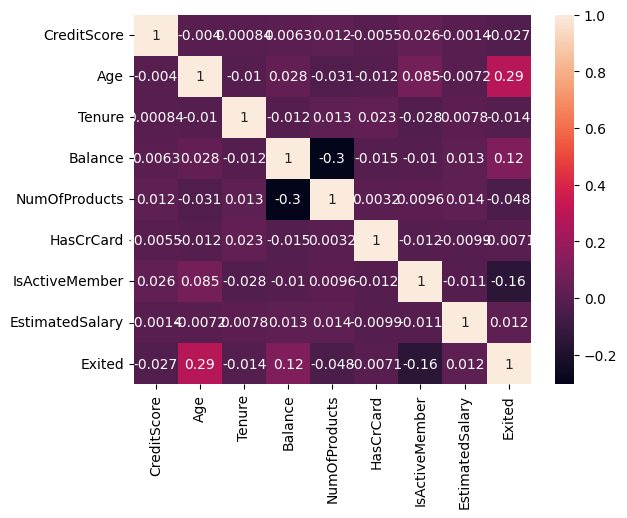

In [59]:
# Correlation heatmap

sns.heatmap(df[numerical_features].corr(), annot=True)

<Axes: xlabel='AgeGroup', ylabel='Exited'>

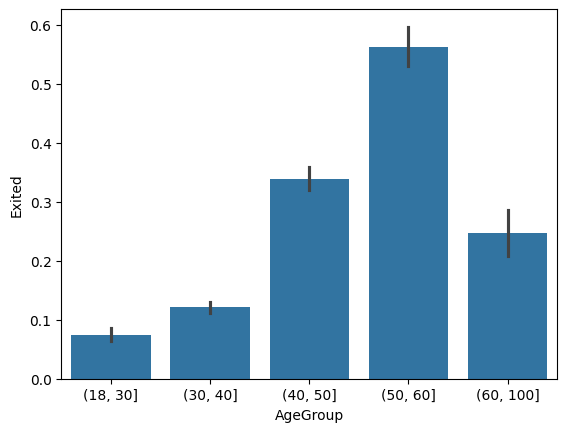

In [60]:
# Churn across binned age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[18,30,40,50,60,100])
sns.barplot(x="AgeGroup", y="Exited", data=df)

In [61]:
from scipy.stats import ttest_ind

group0 = df[df['Exited']==0]['Age']
group1 = df[df['Exited']==1]['Age']

stat, p_val = ttest_ind(group0, group1, equal_var=False)

print("t-statistic:", stat)
print("p-value:", p_val)


t-statistic: -30.419197204406792
p-value: 4.7127272656641046e-179


In [62]:
from scipy.stats import mannwhitneyu

stat, p_val = mannwhitneyu(group0, group1, alternative='two-sided')

print("U-statistic:", stat)
print("p-value:", p_val)

U-statistic: 4345981.5
p-value: 3.2104014319371675e-230


A Mann–Whitney U test was conducted to compare the ages of churned and retained customers. The test revealed a statistically significant difference (p < 0.0001), indicating that churned customers are generally older. This confirms age as an important predictor of customer churn

Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


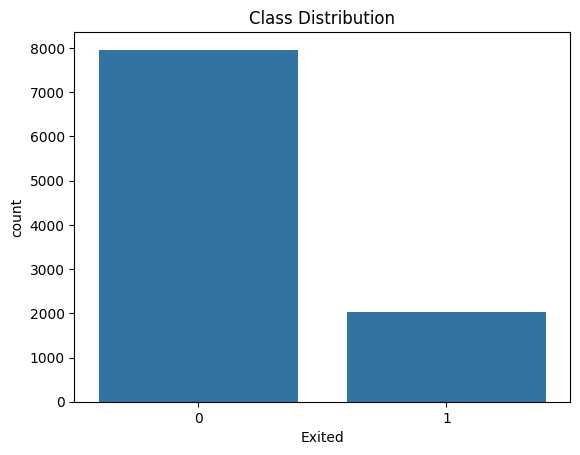

In [66]:
#Check imbalance
imbalance = df['Exited'].value_counts(normalize=True) * 100
print(f'{imbalance}')
sns.countplot(x='Exited', data=df)
plt.title("Class Distribution")
plt.show()

In [72]:
# Check Duplicate rows in entire dataset
df.duplicated().sum()

np.int64(0)